In [57]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 


OneHotEncoder()

In [16]:
data=[]
result=[]

In [17]:
basepath="/content/drive/MyDrive/JWOC/Brain_Tumor_detection/brain_tumor_dataset/yes"
for filename in os.listdir(basepath):
   path=os.path.join(basepath,filename)
   img = Image.open(path)
   img = img.resize((128,128))
   img = np.array(img)
   if(img.shape == (128,128,3)):
      data.append(np.array(img))
      result.append(encoder.transform([[0]]).toarray())

In [12]:
data = np.array(data)
print(data.shape)

(138, 128, 128, 3)


In [13]:
result = np.array(result)

In [14]:
print(result.shape)

(138, 1, 2)


In [18]:
basepath="/content/drive/MyDrive/JWOC/Brain_Tumor_detection/brain_tumor_dataset/no"
for filename in os.listdir(basepath):
   path=os.path.join(basepath,filename)
   img = Image.open(path)
   img = img.resize((128,128))
   img = np.array(img)
   if(img.shape == (128,128,3)):
      data.append(np.array(img))
      result.append(encoder.transform([[1]]).toarray())

In [20]:
data = np.array(data)
print(data.shape)
result = np.array(result)
result = result.reshape(217,2)
print(result.shape)

(217, 128, 128, 3)
(217, 2)


In [21]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

architecture-1

In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adam',metrics='accuracy')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)       

In [24]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
5/5 [==============================] - 13s 2s/step - loss: 19.0693 - accuracy: 0.7283 - val_loss: 63.3163 - val_accuracy: 0.5909
Epoch 2/30
5/5 [==============================] - 11s 2s/step - loss: 12.0532 - accuracy: 0.7514 - val_loss: 24.5673 - val_accuracy: 0.6364
Epoch 3/30
5/5 [==============================] - 12s 2s/step - loss: 8.5184 - accuracy: 0.8208 - val_loss: 28.7696 - val_accuracy: 0.6818
Epoch 4/30
5/5 [==============================] - 12s 2s/step - loss: 5.9773 - accuracy: 0.8439 - val_loss: 15.0645 - val_accuracy: 0.6364
Epoch 5/30
5/5 [==============================] - 12s 2s/step - loss: 3.4882 - accuracy: 0.8902 - val_loss: 13.1171 - val_accuracy: 0.6136
Epoch 6/30
5/5 [==============================] - 12s 2s/step - loss: 1.1762 - accuracy: 0.9306 - val_loss: 11.4729 - val_accuracy: 0.6591
Epoch 7/30
5/5 [==============================] - 12s 2s/step - loss: 1.7163 - accuracy: 0.9364 - val_loss: 12.9686 - val_accuracy: 0.6591
Epoch 8/30
5/5 [=========

architecture-2

In [32]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 65536)             0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [34]:
model.compile(loss = "categorical_crossentropy", optimizer='Adam',metrics='accuracy')
history = model.fit(x_train, y_train, epochs = 10, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/10
5/5 [==============================] - 5s 925ms/step - loss: 0.1670 - accuracy: 0.9595 - val_loss: 1.4972 - val_accuracy: 0.7500
Epoch 2/10
5/5 [==============================] - 5s 892ms/step - loss: 0.0836 - accuracy: 0.9711 - val_loss: 2.1750 - val_accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 4s 866ms/step - loss: 0.0265 - accuracy: 0.9884 - val_loss: 2.0575 - val_accuracy: 0.7955
Epoch 4/10
5/5 [==============================] - 4s 870ms/step - loss: 0.0146 - accuracy: 0.9884 - val_loss: 2.5970 - val_accuracy: 0.7727
Epoch 5/10
5/5 [==============================] - 5s 887ms/step - loss: 0.0136 - accuracy: 0.9942 - val_loss: 3.0977 - val_accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 4s 880ms/step - loss: 0.0258 - accuracy: 0.9769 - val_loss: 2.8521 - val_accuracy: 0.7727
Epoch 7/10
5/5 [==============================] - 4s 885ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 4.2297 - val_accuracy: 0.7500
Epoch 8/10
5/5 [====

In [54]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is Its a Tumor


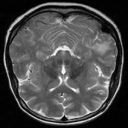

In [56]:
x = x_test[0]
x = x.reshape(1,128,128,3)
res = model.predict(x)
classification = np.where(res == np.amax(res))[1][0]
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))
cv2_imshow(x_test[0])